# <p style="background-color:#E05780;font-family:newtimeroman;color:#FFE0E9;font-size:150%;text-align:center;border-radius:10px 10px;">Breast Cancer Detection</p>
<img src="https://cdn.discordapp.com/attachments/975192383077638174/1243872971471454272/cancer.png?ex=66530e7a&is=6651bcfa&hm=ea870b27012e7e22d22d3adc584a6dad618eb34143831952b205e439f90c2d14&" alt="Breast Cancer" >

This project involves the application of the K-means clustering algorithm on a breast cancer dataset obtained from the University of Wisconsin Hospitals in Madison.
   
**K-Means Clustering Analysis**
* In KMeans clustering analysis, the goal is to partition observations into clusters based on their similarities, aiming to increase homogeneity within clusters.
![Before and after cluster analysis applied to the data set](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*p_5MjuOPeAOsxnjh.png)

<a id="1"></a>
# <p style="background-color:#E05780;font-family:newtimeroman;color:#FFE0E9;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <p style="background-color:#E05780;font-family:newtimeroman;color:#FFE0E9;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [2]:
data=pd.read_csv('data.csv')
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<a id="3"></a>
# <p style="background-color:#E05780;font-family:newtimeroman;color:#FFE0E9;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>
* To clean our dataset and prepare it for analysis, let's first examine the general information of the dataset using data.info(); this shows the data types of each column and any missing values

In [3]:
df=data.drop(['Unnamed: 32','id'],axis=1,inplace=False)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<a id="4"></a>
# <p style="background-color:#E05780;font-family:newtimeroman;color:#FFE0E9;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>
* Label encoding converts categorical data into numerical format, facilitating better performance of machine learning algorithms.
* Class labels assigned by the LabelEncoder correspond to numbers assigned in alphabetical order. Therefore, the "B" (benign) class is assigned to 0, and the "M" (malignant) class is assigned to 1.

In [6]:
df.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis]

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


diagnosis
0    357
1    212
Name: count, dtype: int64


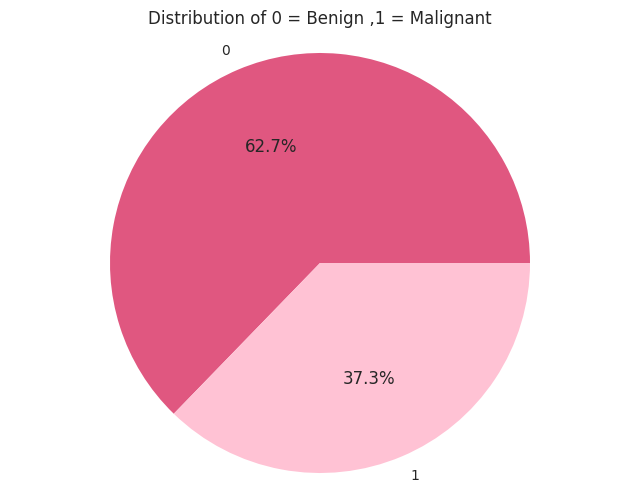

In [8]:
diagnosis_counts = df['diagnosis'].value_counts()
print(df.diagnosis.value_counts())
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', colors=['#E05780', '#FFC2D4'])
plt.title('Distribution of 0 = Benign ,1 = Malignant')
plt.axis('equal')  
plt.show()

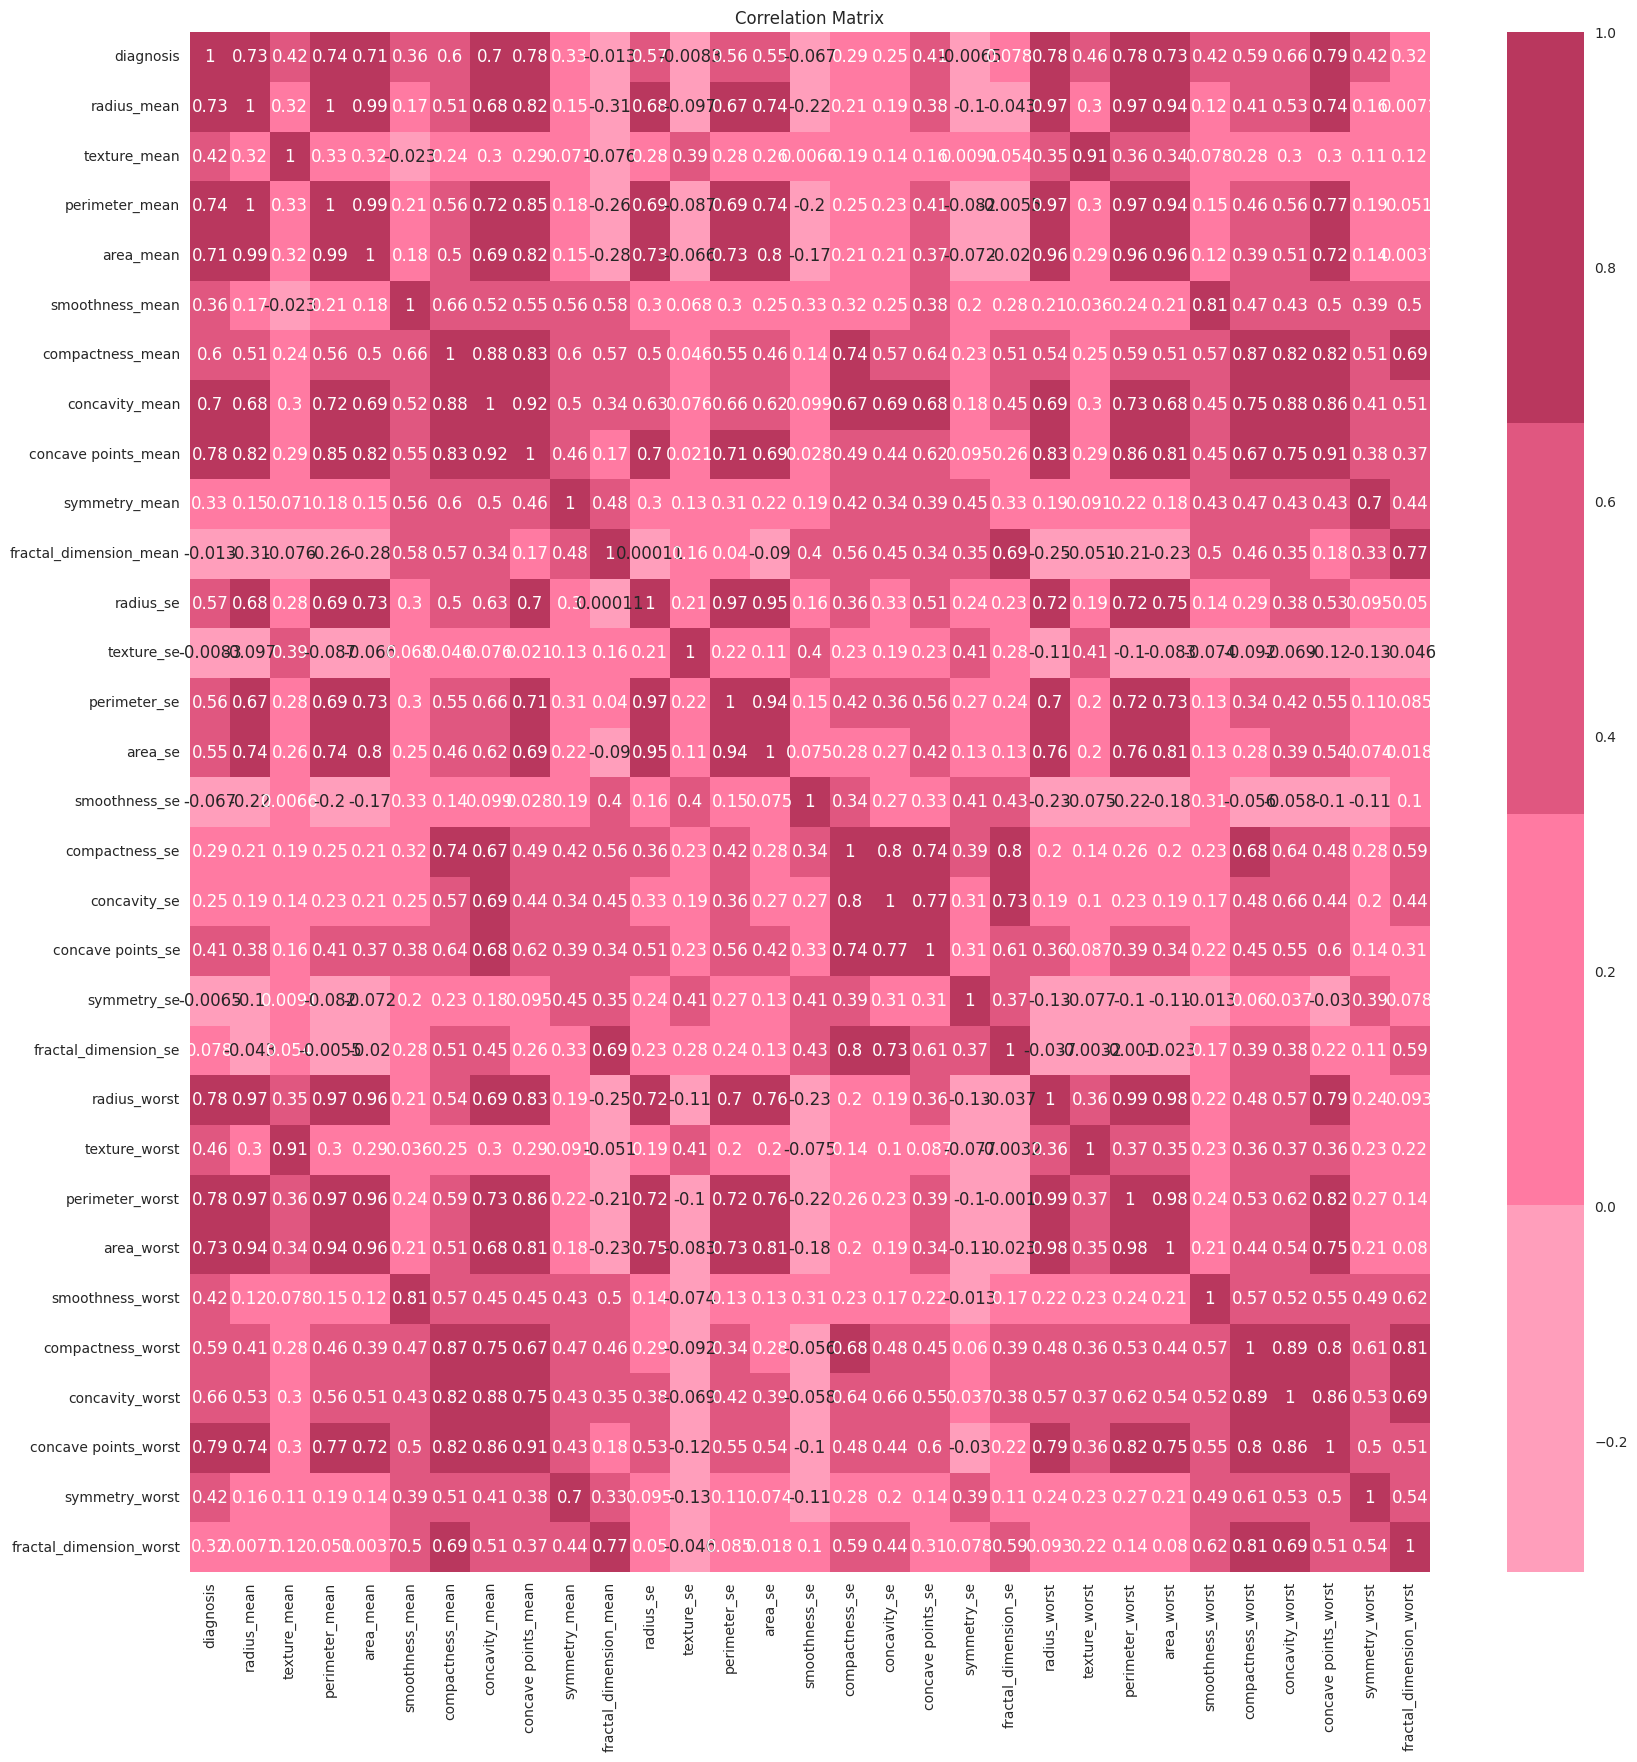

In [9]:
pallet = ["#B9375E", "#E05780", "#FF7AA2", "#FF9EBB", "#FFC2D4", "#FFE0E9"]
cmap = colors.ListedColormap(pallet[::-1])
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.title('Correlation Matrix')
plt.show()

In [10]:
X = df.drop(columns="diagnosis")  # Independent variables
y = df.diagnosis  # Dependent variable

* Scale the Features: Standardize the features using StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X),columns= X.columns )
print("All features are now scaled")

All features are now scaled


In [12]:
scaled_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


<a id="5"></a>
# <p style="background-color:#E05780;font-family:newtimeroman;color:#FFE0E9;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>

In [13]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_X)
PCA_ds = pd.DataFrame(pca.transform(scaled_X), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,569.0,0.000000e+00,3.647601,-5.565736,-2.757430,-1.173831,2.508766,16.319233
col2,569.0,6.868164e-17,2.387755,-7.775853,-1.499825,-0.195956,1.228297,12.573194
col3,569.0,1.873136e-17,1.680152,-4.880362,-1.017071,-0.155701,0.856828,10.112420


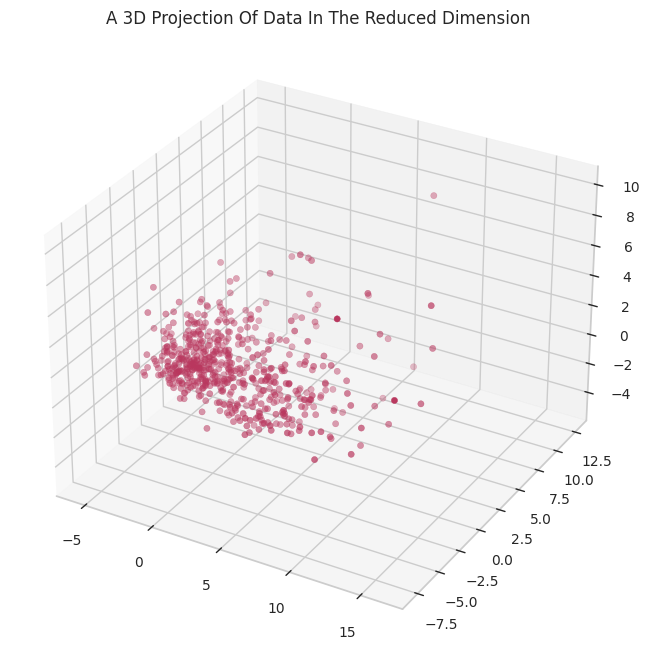

In [14]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#B9375E", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<a id="6"></a>
# <p style="background-color:#E05780;font-family:newtimeroman;color:#FFE0E9;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

**Determine Optimal Number of Clusters**
* Calculate inertia (within-cluster sum of squares) for a range of cluster numbers.
* Calculate silhouette scores for the same range of cluster numbers.

In [15]:
inertia = []
silhouette_scores = []
for i in range(2, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(PCA_ds)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(PCA_ds , kmeans.labels_))

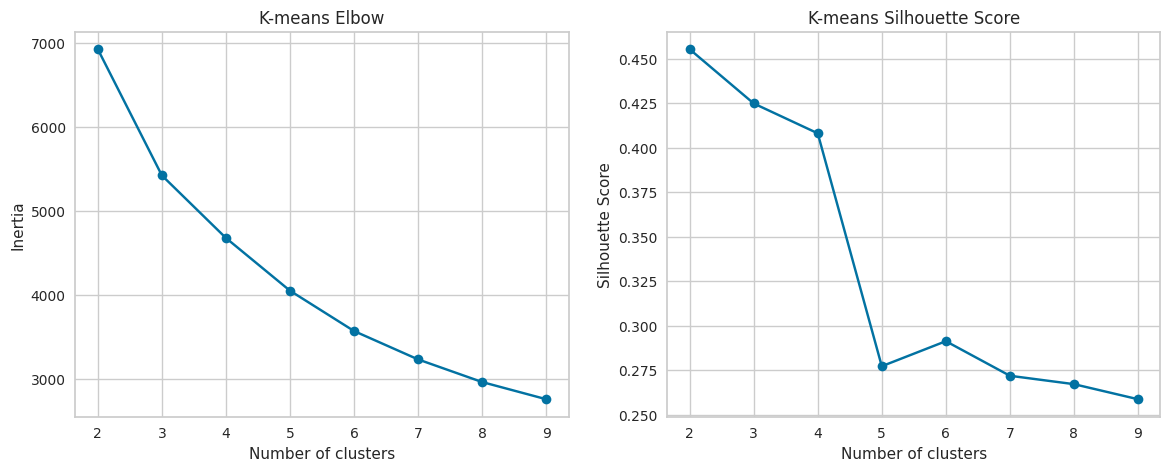

In [16]:
# Inertia ve Silhouette Score değerlerini görselleştirme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Inertia plot
ax1.plot(range(2, 10), inertia, marker='o')
ax1.set_title('K-means Elbow')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')

# Silhouette Score plot
ax2.plot(range(2, 10), silhouette_scores, marker='o')
ax2.set_title('K-means Silhouette Score')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

**Elbow Method:**
* The Elbow Method attempts to determine the optimal number of clusters for a K-Means model by visualizing the inertia value for different numbers of clusters.
* Inertia represents the sum of squared distances between each data point and its cluster centroid.
* In the Elbow Method plot, the changes in inertia values are examined with respect to the number of clusters. The optimal number of clusters is identified as the "elbow" point where the inertia starts decreasing at a slower rate.
* Usage and Interpretation:
* The Elbow Method provides a rough guideline for determining the number of clusters. However, this method may sometimes not provide a clear "elbow" point, leading to subjective interpretation.

**Silhouette Score:** 
* The Silhouette Score measures the accuracy of a clustering model and is used to evaluate clustering results.
* Silhouette Score calculates the cohesion (closeness) of each data point to its own cluster and the average distance to points in other clusters.
* The Silhouette Score of a data point measures the difference between how close it is to other points in its own cluster and how far it is from points in other clusters.
* Usage and Interpretation:
* Silhouette Score ranges from -1 to 1.
* Values close to 1 indicate that data points belong to well-separated clusters.
* Values close to 0 or negative indicate that data points may belong to incorrect clusters or in overlapping regions between clusters.

In [17]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started range from 2
print('optimal_clusters',optimal_clusters,max(silhouette_scores))
kMeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_kmeans = kMeans.fit_predict(PCA_ds)

optimal_clusters 2 0.4552273483171665


In [18]:
PCA_ds["Clusters"] = y_kmeans
PCA_ds.head()

,col1,col2,col3,Clusters
0,9.192837,1.948583,-1.123165,1
1,2.387802,-3.768172,-0.529290,1
2,5.733896,-1.075174,-0.551747,1
3,7.122953,10.275589,-3.232789,1
4,3.935302,-1.948072,1.389768,1


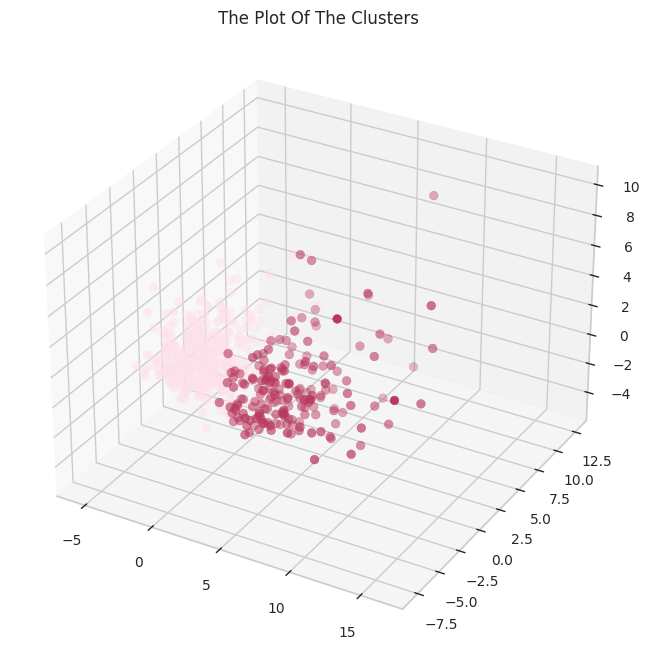

In [19]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Elbow Method to determine the number of clusters to be formed:


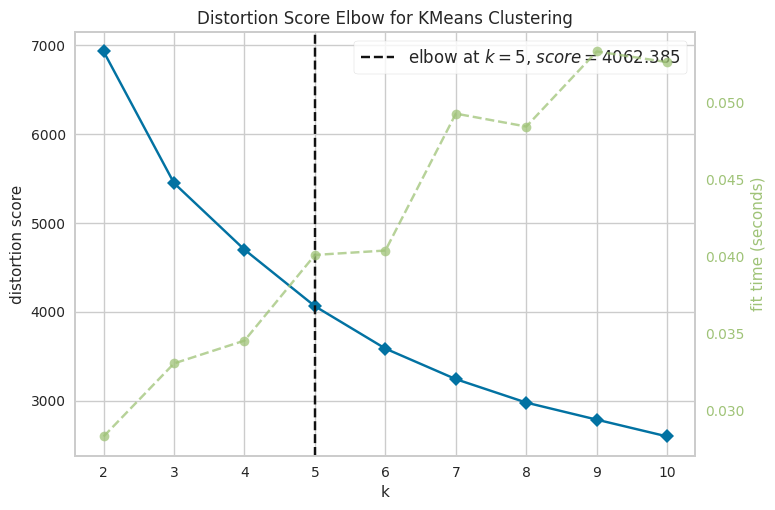

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()


In [21]:
#Initiating the Agglomerative Clustering model 
KM = KMeans(n_clusters=5)
# fit model and predict clusters
yhat_KM = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_KM

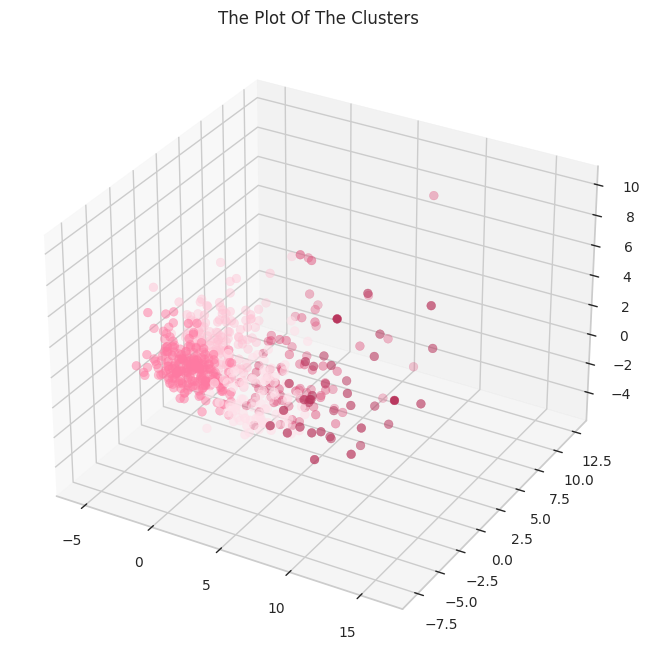

In [22]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

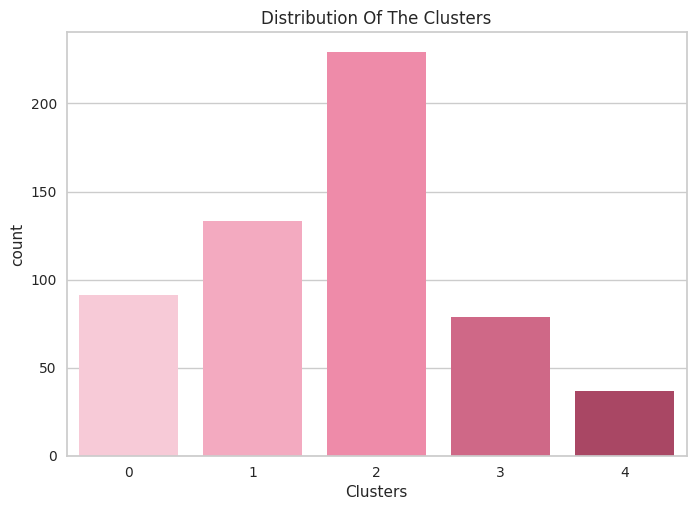

In [23]:
#Plotting countplot of clusters
pal = ["#FFC2D4","#FF9EBB", "#FF7AA2","#E05780","#B9375E"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()